##Show the Data
- A dynamite plot - a bar graph of group averages with error bars denoting standard errors - provides almost no information about a distribution.
- By showing the data, you provide viewers extra information about distributions.
- Jitter is adding a small random shift to each point in order to minimize the number of overlapping points. To add jitter, use the  geom_jitter() geometry instead of geom_point(). (See example below.)
- Alpha blending is making points somewhat transparent, helping visualize the density of overlapping points. Add an alpha argument to the geometry.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



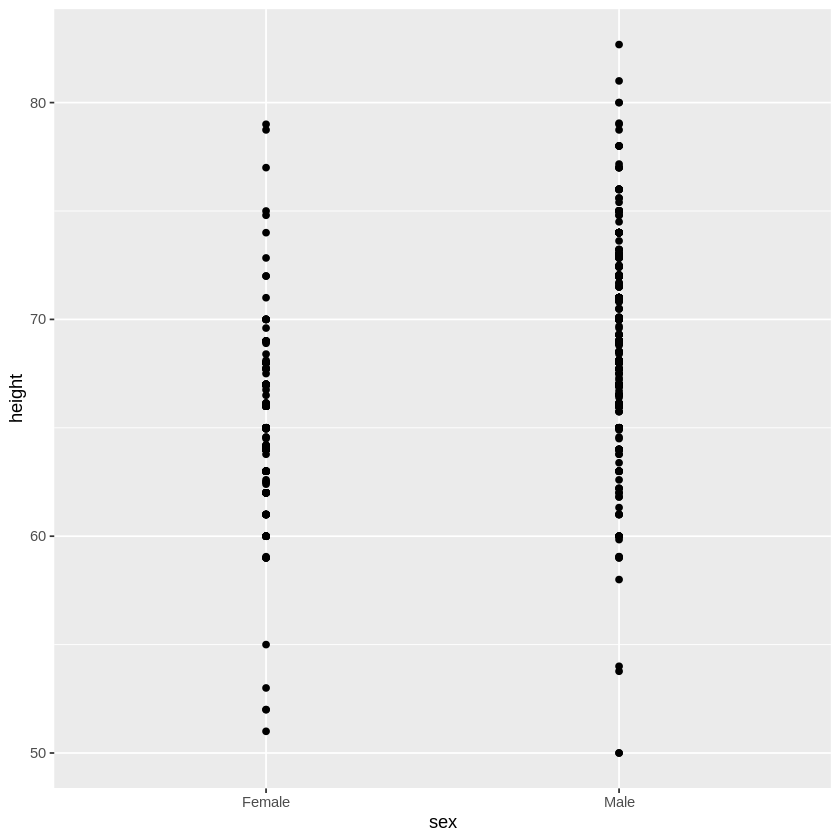

In [4]:
library(dplyr)
install.packages("dslabs")
library(ggplot2)
library(dslabs)
# dot plot showing the data
heights %>% ggplot(aes(sex, height)) + geom_point()

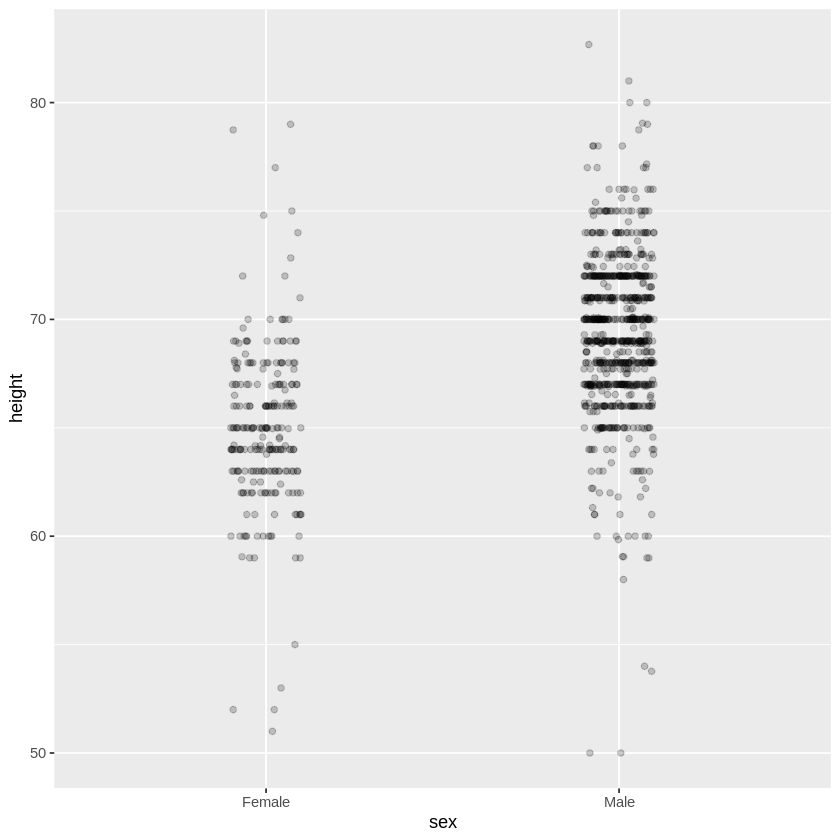

In [5]:
# jittered, alpha blended point plot
heights %>% ggplot(aes(sex, height)) + 
geom_jitter(width = 0.1, alpha = 0.2)

##Ease Comparisons: Use Common Axes
- Ease comparisons by keeping axes the same when comparing data across multiple plots.
- Align plots vertically to see horizontal changes. Align plots horizontally to see vertical changes.
- Bar plots are useful for showing one number but not useful for showing distributions.

##Consider Transformations
- Use transformations when warranted to ease visual interpretation.
- The log transformation is useful for data with multiplicative changes. The logistic transformation is useful for fold changes in odds. The square root transformation is useful for count data.
- We learned how to apply transformations earlier in the course.

##Ease Comparisons: Compared Visual Cues Should Be Adjacent
- When two groups are to be compared, it is optimal to place them adjacent in the plot.
- Use color to encode groups to be compared.
- Consider using a color blind friendly palette like the one in this video.

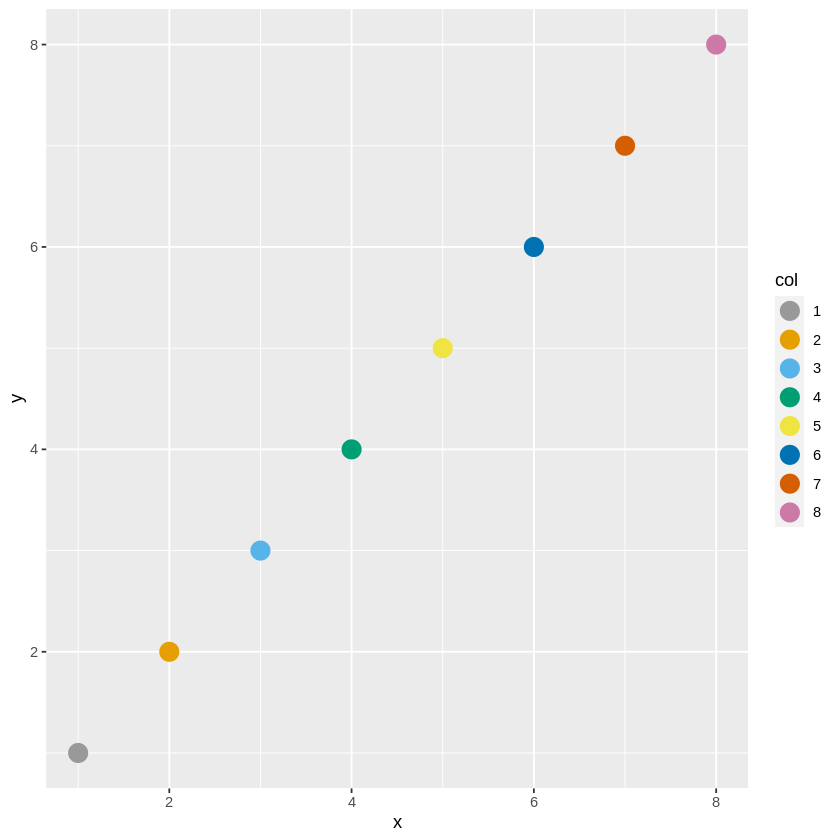

In [8]:
color_blind_friendly_cols <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

p1 <- data.frame(x = 1:8, y = 1:8, col = as.character(1:8)) %>%
    ggplot(aes(x, y, color = col)) +
    geom_point(size = 5)
p1 + scale_color_manual(values = color_blind_friendly_cols)

#Assessment: Data Visualization Principles, Part 2

Exercise 1: Customizing plots - watch and learn

To make the plot on the right in the exercise from the last set of assessments, we had to reorder the levels of the states' variables.
- Redefine the state object so that the levels are re-ordered by rate.
- Print the new object state and its levels (using levels) so you can see that the vector is now re-ordered by the levels.

In [10]:
library(dplyr)
library(ggplot2)
library(dslabs)
dat <- us_contagious_diseases %>%
filter(year == 1967 & disease=="Measles" & !is.na(population)) %>% 
mutate(rate = count / population * 10000 * 52 / weeks_reporting)
state <- dat$state 
rate <- dat$count/(dat$population/10000)*(52/dat$weeks_reporting)


state <- reorder(state,rate,FUN=mean)
levels(state)

[1] "Georgia"              "District Of Columbia" "Connecticut"         
 [4] "Minnesota"            "Louisiana"            "New Hampshire"       
 [7] "Maryland"             "Kansas"               "New York"            
[10] "Pennsylvania"         "Rhode Island"         "Massachusetts"       
[13] "Missouri"             "New Jersey"           "South Dakota"        
[16] "Vermont"              "Delaware"             "Ohio"                
[19] "Illinois"             "Michigan"             "Indiana"             
[22] "North Carolina"       "South Carolina"       "Hawaii"              
[25] "Maine"                "California"           "Florida"             
[28] "Iowa"                 "Mississippi"          "Oklahoma"            
[31] "Nebraska"             "Utah"                 "Alabama"             
[34] "Kentucky"             "Wisconsin"            "Montana"             
[37] "Virginia"             "Alaska"               "Tennessee"           
[40] "Idaho"                "New Mexico"           "Arizona"             
[43] "Nevada"               "Arkansas"             "Wyoming"             
[46] "Colorado"             "West Virginia"        "Oregon"              
[49] "Texas"                "North Dakota"         "Washington"

Exercise 2: Customizing plots - redefining

Now we are going to customize this plot a little more by creating a rate variable and reordering by that variable instead.
- Add a single line of code to the definition of the dat table that uses mutate to reorder the states by the rate variable.
- The sample code provided will then create a bar plot using the newly defined dat.

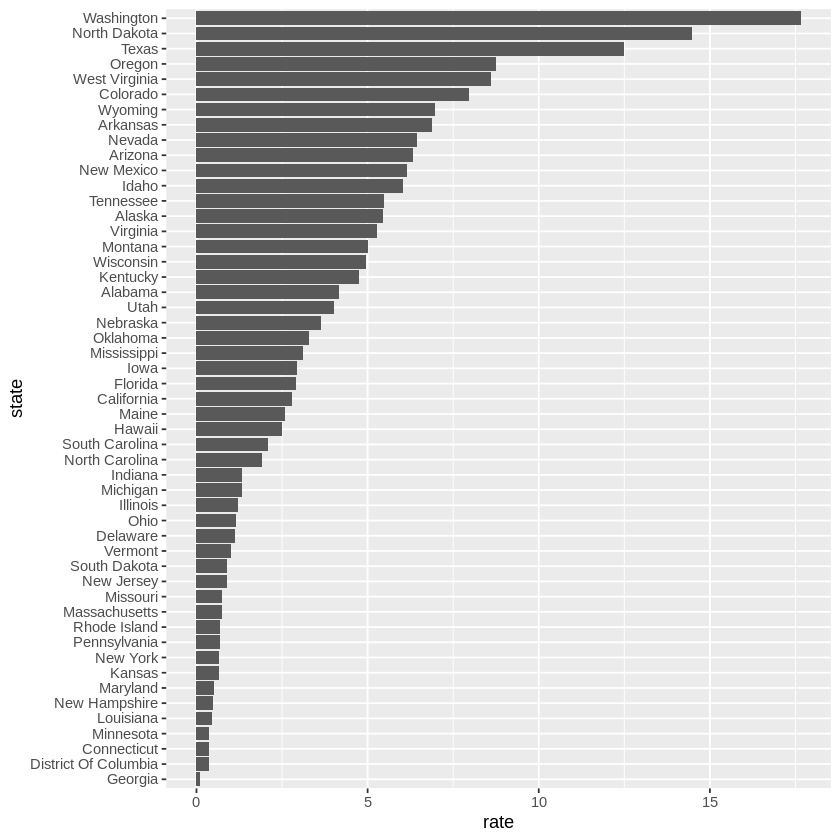

In [11]:
data(us_contagious_diseases)
dat <- us_contagious_diseases %>% 
filter(year == 1967 & disease=="Measles" & count>0 & !is.na(population)) %>%
mutate(rate = count / population * 10000 * 52 / weeks_reporting) %>% 
mutate(state =reorder(state,rate,FUN=mean))

dat %>% ggplot(aes(state, rate)) +
  geom_bar(stat="identity") +
  coord_flip()

Exercise 3: Showing the data and customizing plots

Say we are interested in comparing gun homicide rates across regions of the US. We see this plot:

And decide to move to a state in the western region. What is the main problem with this interpretaion?

Ans: It does not show all the data. We do not see the variability within a region and it's possible that the safest states are not in the West.


`summarise()` ungrouping output (override with `.groups` argument)



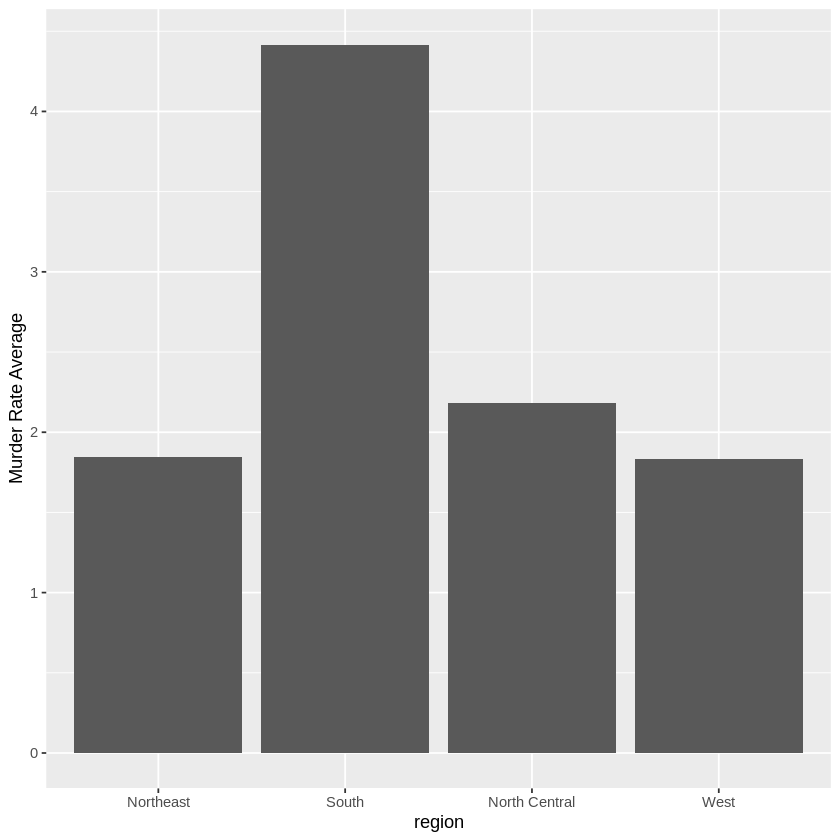

In [12]:
library(dplyr)
library(ggplot2)
library(dslabs)
data("murders")
murders %>% mutate(rate = total/population*100000) %>%
  group_by(region) %>%
  summarize(avg = mean(rate)) %>%
  mutate(region = factor(region)) %>%
  ggplot(aes(region, avg)) +
  geom_bar(stat="identity") +
  ylab("Murder Rate Average")

Exercise 4: Making a box plot

To further investigate whether moving to the western region is a wise decision, let's make a box plot of murder rates by region, showing all points.
- Order the regions by their median murder rate by using mutate and reorder.
- Make a box plot of the murder rates by region.
- Show all of the points on the box plot.


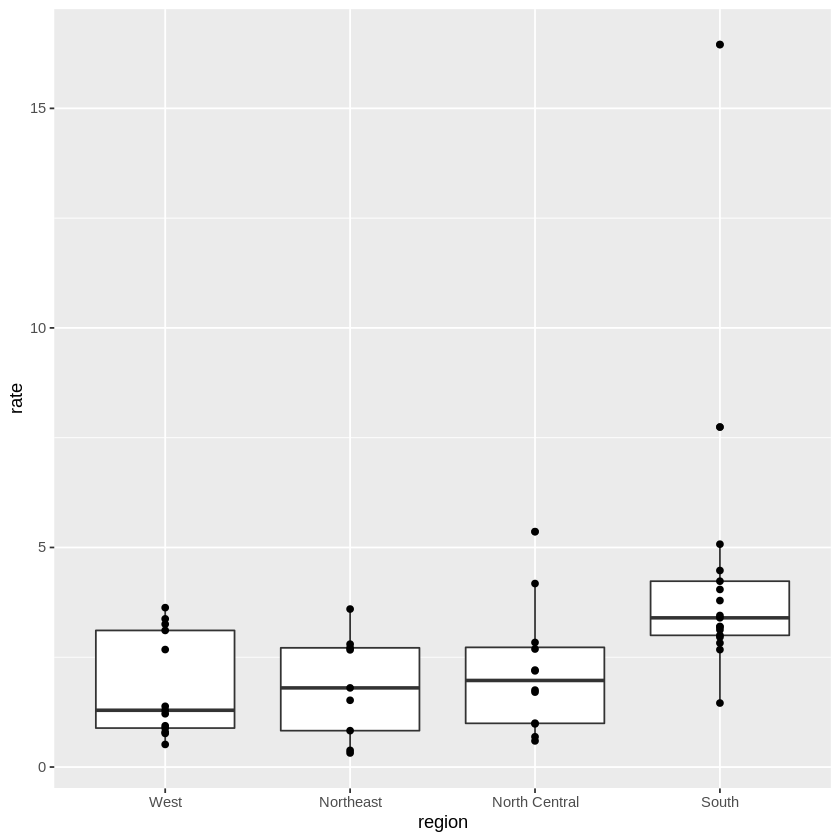

In [13]:
library(dplyr)
library(ggplot2)
library(dslabs)
data("murders")
murders %>% mutate(rate = total/population*100000) %>%
  mutate(region = reorder(region, rate, FUN = median)) %>% 
  ggplot(aes(region,rate)) +
  geom_boxplot() + 
  geom_point()